In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = os.path.expanduser("~/Downloads/tim_data")

colors = ["Green", "Yellow", "", "Red"]

events = [21, 22, 23, 24, 25, 26,
          41, 42, 43, 44, 45, 46,
          81, 82, 83, 84, 85, 86]

columns = ["Event.Name", "Color", "Step", "SCR"]

all_subjects = pd.DataFrame(columns=columns)

In [8]:
for file in os.listdir(path):
    if not os.path.isdir(os.path.join(path, file)):
        continue
    if ".DS_Store" in file:
        continue
    subject = file
    print(f"Processing subject {subject}")
    df = pd.read_csv(os.path.join(path, file, f"{subject}_era_2s.txt"), sep="\t")
    df = df[df["Event.Name"].isin(events)]

    df["Color"] = [colors[int(name) // 20 - 1] for name in df["Event.Name"]]
    df["Step"] = [int(name) % 10 for name in df["Event.Name"]]
    df["SCR"] = df["Global.Mean"] - df["CDA.Tonic"]

    all_subjects = pd.concat([all_subjects, df[columns]], ignore_index=True)


Processing subject sub-489
Processing subject sub-509
Processing subject sub-507
Processing subject sub-500
Processing subject sub-506
Processing subject sub-508
Processing subject sub-515
Processing subject sub-512
Processing subject sub-513
Processing subject sub-514
Processing subject sub-503
Processing subject sub-504
Processing subject sub-505
Processing subject sub-502
Processing subject sub-511
Processing subject sub-516
Processing subject sub-510


/var/folders/bx/rq2wdz0j56573ttp8p0y1z900000gn/T/ipykernel_30460/3535167352.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_subjects = pd.concat([all_subjects, df[columns]], ignore_index=True)


In [9]:
all_subjects.head()

,Event.Name,Color,Step,SCR
0,81,Red,1,1.7257
1,82,Red,2,0.8967
2,83,Red,3,0.9581
3,84,Red,4,0.8293
4,85,Red,5,0.5640


In [10]:
all_subjects

,Event.Name,Color,Step,SCR
0,81,Red,1,1.7257
1,82,Red,2,0.8967
2,83,Red,3,0.9581
3,84,Red,4,0.8293
4,85,Red,5,0.5640
...,...,...,...,...
3064,82,Red,2,0.0231
3065,83,Red,3,0.0173
3066,84,Red,4,0.0437
3067,85,Red,5,0.1175


In [11]:
length = len(all_subjects)
trials = length / 17 / 6

In [12]:
trials

30.08823529411765

/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/omerdayan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

Text(42.945208333333326, 0.5, 'SCR')

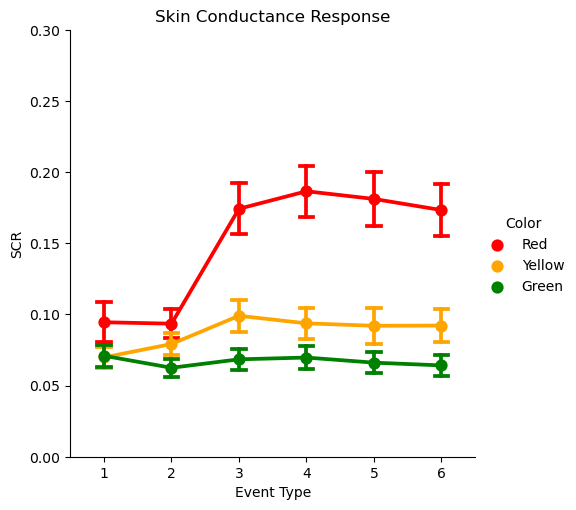

In [21]:
import seaborn as sns

color_map = {
        'Red': 'red',
        'Yellow': 'orange',
        'Green': 'green'
    }


sns.catplot(data=all_subjects, x="Step", y="SCR", hue="Color", errorbar="se", capsize=.2, kind="point", palette=color_map)
plt.ylim(0, .3)
plt.title(f"Skin Conductance Response")
plt.xlabel("Event Type")
plt.ylabel("SCR")